In [19]:
import pandas as pd
import matplotlib.pyplot as plt
merge = pd.read_csv('Merge.csv')

In [21]:
datetime = merge["datetime"].values
year = [int(my_str.split("-")[0]) for my_str in datetime]
merge["year"] = year
month = [int(my_str.split("-")[1]) for my_str in datetime]
merge['month'] = month
merge

,Unnamed: 0,datetime,order_id,user_id,item_id,province_id,city_id,quantity,brand_id,brandfamily_id,package_id,info_id,year,month
0,52784,2017-01-01,46958,352,53,1,11,1.425029,[11],5,6,HGO,2017,1
1,39367,2017-01-01,46958,352,39,1,11,2.427209,[11],5,5,HGO,2017,1
2,6170,2017-01-01,85599,62,6,1,0,3.760882,"[6, 19]",2,1,BHM,2017,1
3,52589,2017-01-01,13330,352,53,1,11,0.712514,[11],5,6,HGO,2017,1
4,81522,2017-01-01,85599,62,41,1,0,1.672474,"[6, 8]",4,1,BZMN,2017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145190,34820,2020-12-31,8476,419,72,2,19,0.069190,"[6, 19]",2,2,BHM,2020,12
145191,98963,2020-12-31,76049,66,71,1,16,2.078201,[11],5,7,HGO,2020,12
145192,99107,2020-12-31,63274,269,71,1,3,5.195502,[11],5,7,HGO,2020,12
145193,133219,2020-12-31,27911,326,105,0,4,0.015935,[11],5,1,HGO,2020,12


In [22]:
merge = merge[[
    'year', 'month', 'order_id', 'user_id', 'item_id', 'province_id',
    'city_id', 'quantity', 'brand_id', 'brandfamily_id', 'package_id'
]]

In [23]:
merge

,year,month,order_id,user_id,item_id,province_id,city_id,quantity,brand_id,brandfamily_id,package_id
0,2017,1,46958,352,53,1,11,1.425029,[11],5,6
1,2017,1,46958,352,39,1,11,2.427209,[11],5,5
2,2017,1,85599,62,6,1,0,3.760882,"[6, 19]",2,1
3,2017,1,13330,352,53,1,11,0.712514,[11],5,6
4,2017,1,85599,62,41,1,0,1.672474,"[6, 8]",4,1
...,...,...,...,...,...,...,...,...,...,...,...
145190,2020,12,8476,419,72,2,19,0.069190,"[6, 19]",2,2
145191,2020,12,76049,66,71,1,16,2.078201,[11],5,7
145192,2020,12,63274,269,71,1,3,5.195502,[11],5,7
145193,2020,12,27911,326,105,0,4,0.015935,[11],5,1


In [24]:
merge.corr().style.background_gradient(cmap='Reds')

,year,month,order_id,user_id,item_id,province_id,city_id,quantity,brandfamily_id,package_id
year,1.000000,0.092775,-0.001146,0.030306,-0.000961,-0.082117,-0.008493,-0.054696,0.177383,0.055061
month,0.092775,1.000000,-0.002165,0.011503,0.012534,0.007497,0.017662,-0.049106,0.077229,0.050640
order_id,-0.001146,-0.002165,1.000000,0.001974,-0.004233,0.003009,0.002538,-0.001435,0.000825,0.003663
user_id,0.030306,0.011503,0.001974,1.000000,0.022513,-0.234043,-0.124730,-0.017998,-0.003055,0.001521
item_id,-0.000961,0.012534,-0.004233,0.022513,1.000000,-0.074892,-0.082263,0.078229,0.074324,0.050607
province_id,-0.082117,0.007497,0.003009,-0.234043,-0.074892,1.000000,0.590809,0.196085,-0.065477,0.041884
city_id,-0.008493,0.017662,0.002538,-0.124730,-0.082263,0.590809,1.000000,0.278774,-0.164811,-0.163224
quantity,-0.054696,-0.049106,-0.001435,-0.017998,0.078229,0.196085,0.278774,1.000000,-0.317016,-0.187864
brandfamily_id,0.177383,0.077229,0.000825,-0.003055,0.074324,-0.065477,-0.164811,-0.317016,1.000000,0.388382
package_id,0.055061,0.050640,0.003663,0.001521,0.050607,0.041884,-0.163224,-0.187864,0.388382,1.000000


In [26]:
x = merge[[
    'year', 'month', 'order_id', 'user_id', 'item_id', 'province_id',
    'city_id', 'brandfamily_id', 'package_id'
]]
y = merge['quantity']
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
SelectKBest = SelectKBest(f_regression, k=3)
bestFeature = SelectKBest.fit_transform(x, y)
print(SelectKBest.get_support())
print(x.columns[SelectKBest.get_support()])

[False False False False False  True  True  True False]
Index(['province_id', 'city_id', 'brandfamily_id'], dtype='object')


array([[<AxesSubplot:xlabel='year', ylabel='year'>,
        <AxesSubplot:xlabel='month', ylabel='year'>,
        <AxesSubplot:xlabel='item_id', ylabel='year'>,
        <AxesSubplot:xlabel='province_id', ylabel='year'>],
       [<AxesSubplot:xlabel='year', ylabel='month'>,
        <AxesSubplot:xlabel='month', ylabel='month'>,
        <AxesSubplot:xlabel='item_id', ylabel='month'>,
        <AxesSubplot:xlabel='province_id', ylabel='month'>],
       [<AxesSubplot:xlabel='year', ylabel='item_id'>,
        <AxesSubplot:xlabel='month', ylabel='item_id'>,
        <AxesSubplot:xlabel='item_id', ylabel='item_id'>,
        <AxesSubplot:xlabel='province_id', ylabel='item_id'>],
       [<AxesSubplot:xlabel='year', ylabel='province_id'>,
        <AxesSubplot:xlabel='month', ylabel='province_id'>,
        <AxesSubplot:xlabel='item_id', ylabel='province_id'>,
        <AxesSubplot:xlabel='province_id', ylabel='province_id'>]],
      dtype=object)

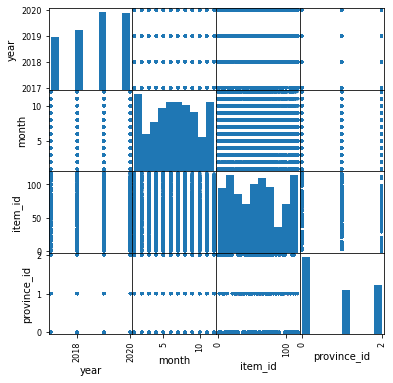

In [28]:
features = merge[['year', 'month', 'item_id', 'province_id']]
pd.plotting.scatter_matrix(features, alpha=0.7, figsize=(6,6), diagonal='hist')

array([[<AxesSubplot:xlabel='标准化year', ylabel='标准化year'>,
        <AxesSubplot:xlabel='标准化month', ylabel='标准化year'>,
        <AxesSubplot:xlabel='标准化item_id', ylabel='标准化year'>,
        <AxesSubplot:xlabel='标准化province_id', ylabel='标准化year'>],
       [<AxesSubplot:xlabel='标准化year', ylabel='标准化month'>,
        <AxesSubplot:xlabel='标准化month', ylabel='标准化month'>,
        <AxesSubplot:xlabel='标准化item_id', ylabel='标准化month'>,
        <AxesSubplot:xlabel='标准化province_id', ylabel='标准化month'>],
       [<AxesSubplot:xlabel='标准化year', ylabel='标准化item_id'>,
        <AxesSubplot:xlabel='标准化month', ylabel='标准化item_id'>,
        <AxesSubplot:xlabel='标准化item_id', ylabel='标准化item_id'>,
        <AxesSubplot:xlabel='标准化province_id', ylabel='标准化item_id'>],
       [<AxesSubplot:xlabel='标准化year', ylabel='标准化province_id'>,
        <AxesSubplot:xlabel='标准化month', ylabel='标准化province_id'>,
        <AxesSubplot:xlabel='标准化item_id', ylabel='标准化province_id'>,
        <AxesSubplot:xlabel='标准化province_id', ylabel=

findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.
findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.
/Users/lcy/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26631 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/lcy/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20934 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/lcy/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/lcy/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 26631 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/lcy/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 2

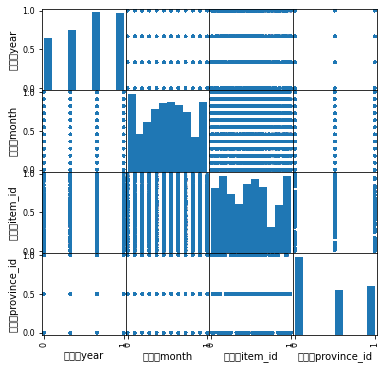

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for feature in features.columns:
    features['标准化' + feature] = scaler.fit_transform(features[[feature]])

#散点可视化，查看特征归一化后的数据
font = {'family': 'SimHei'}
plt.rc('font', **font)
pd.plotting.scatter_matrix(
    features[['标准化year', '标准化month', '标准化item_id', '标准化province_id']],
    alpha=0.7,
    figsize=(6, 6),
    diagonal='hist')